#### **TEMA:**SVM (SUPPORT VECTOR MACHINE)

##### **INTEGRANTES:** 
#####                 _José Cueva_
#####                 _Estefanía Quimbiulco_

**Objetivos:**
+ Implementar SVM utilizando las librerias de python
+ Usar scikit-learn para clasificar instancias mediante SVM
+ Crear un modelo de clasificación y evaluar utilizando métricas apropiadas

In [3]:
# Importar librerias
!pip install scikit-learn==0.23.1

In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
#leer el dataset
df=pd.read_csv("RegistrosMedicos.csv")
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,9,10,10,1,10,8,3,3,1,0
1,5,8,8,8,5,10,7,8,1,0
2,10,2,2,1,2,6,1,1,2,0
3,6,10,10,2,8,10,7,3,3,0
4,10,9,8,7,6,4,7,10,3,0


In [6]:
df["class"].unique()

array([0, 1])

In [7]:
df.dtypes

clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

In [8]:
df.shape

(525, 10)

In [9]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.639617,0.646653,0.474227,0.521095,0.575444,0.552861,0.537681,0.352912,-0.706864
size_uniformity,0.639617,1.000000,0.909176,0.715039,0.752172,0.683772,0.764121,0.711335,0.476448,-0.809226
shape_uniformity,0.646653,0.909176,1.000000,0.695451,0.715744,0.716086,0.737721,0.699798,0.454818,-0.813877
marginal_adhesion,0.474227,0.715039,0.695451,1.000000,0.584046,0.648329,0.666370,0.631791,0.411031,-0.690956
epithelial_size,0.521095,0.752172,0.715744,0.584046,1.000000,0.584595,0.612840,0.620295,0.469371,-0.677947
bare_nucleoli,0.575444,0.683772,0.716086,0.648329,0.584595,1.000000,0.702069,0.576891,0.342451,-0.803681
bland_chromatin,0.552861,0.764121,0.737721,0.666370,0.612840,0.702069,1.000000,0.665065,0.364205,-0.775519
normal_nucleoli,0.537681,0.711335,0.699798,0.631791,0.620295,0.576891,0.665065,1.000000,0.453178,-0.714188
mitoses,0.352912,0.476448,0.454818,0.411031,0.469371,0.342451,0.364205,0.453178,1.000000,-0.417426
class,-0.706864,-0.809226,-0.813877,-0.690956,-0.677947,-0.803681,-0.775519,-0.714188,-0.417426,1.000000


In [10]:
#Verificar valores faltantes
df.replace("?",np.NaN,inplace=True)
datos_faltantes=df.isnull()
for column in datos_faltantes.columns.values.tolist():
    print(column)
    print(datos_faltantes[column].value_counts())
    print("")

clump_thickness
False    525
Name: clump_thickness, dtype: int64

size_uniformity
False    525
Name: size_uniformity, dtype: int64

shape_uniformity
False    525
Name: shape_uniformity, dtype: int64

marginal_adhesion
False    525
Name: marginal_adhesion, dtype: int64

epithelial_size
False    525
Name: epithelial_size, dtype: int64

bare_nucleoli
False    525
Name: bare_nucleoli, dtype: int64

bland_chromatin
False    525
Name: bland_chromatin, dtype: int64

normal_nucleoli
False    525
Name: normal_nucleoli, dtype: int64

mitoses
False    525
Name: mitoses, dtype: int64

class
False    525
Name: class, dtype: int64



#### Analisis para el modelo de prediccion/clasificacion con SVM

<AxesSubplot:xlabel='shape_uniformity', ylabel='size_uniformity'>

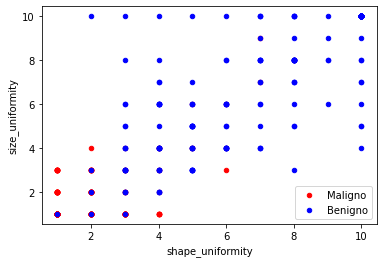

In [13]:
ax=df[df["class"]==1].plot(kind="scatter",x="shape_uniformity",y="size_uniformity",color="Red",label="Maligno");
df[df["class"]==0].plot(kind="scatter",x="shape_uniformity",y="size_uniformity",color="Blue",label="Benigno",ax=ax)

In [14]:
# Definir las varibles
x=np.asarray(df[["clump_thickness","size_uniformity","shape_uniformity","marginal_adhesion","epithelial_size","bare_nucleoli","bland_chromatin","normal_nucleoli","mitoses"]])
y=np.asarray(df["class"])

In [15]:
x[0:5]

array([[ 9, 10, 10,  1, 10,  8,  3,  3,  1],
       [ 5,  8,  8,  8,  5, 10,  7,  8,  1],
       [10,  2,  2,  1,  2,  6,  1,  1,  2],
       [ 6, 10, 10,  2,  8, 10,  7,  3,  3],
       [10,  9,  8,  7,  6,  4,  7, 10,  3]])

In [16]:
y[0:5]

array([0, 0, 0, 0, 0])

In [17]:
#Dividir el dataset
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=4)
print("Conjunto de Entrenamiento:",xtrain.shape,ytrain.shape)
print("Conjunto de Prueba/Validación:",xtest.shape,ytest.shape)

Conjunto de Entrenamiento: (367, 9) (367,)
Conjunto de Prueba/Validación: (158, 9) (158,)


In [18]:
#Implementamos SVM
from sklearn import svm

In [19]:
#Definir la función para el dataset
c_svm=svm.SVC(kernel="rbf")
#El ajuste o entrenamiento
c_svm.fit(xtrain,ytrain)

SVC()

In [20]:
#calcular la hipoteis
h=c_svm.predict(xtest)
h[0:5]

array([1, 1, 0, 1, 0])

In [21]:
#Obtener las métricas
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

In [22]:
print(classification_report(ytest,h))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.97      0.97      0.97       105

    accuracy                           0.96       158
   macro avg       0.96      0.96      0.96       158
weighted avg       0.96      0.96      0.96       158



In [23]:
matriz_confusion=confusion_matrix(ytest,h)

In [24]:
matriz_confusion

array([[ 50,   3],
       [  3, 102]])

In [25]:
MSE1=mean_squared_error(ytest,h)
print("el MSE del modelo es:",MSE1)

el MSE del modelo es: 0.0379746835443038


In [26]:
#Probar con funcion sigmoid para el kernel
#Definir la función para el kernel
c1_svm=svm.SVC(kernel="sigmoid")
#el ajuste o entrenamiento
c1_svm.fit(xtrain,ytrain)
#calcular la hipotesis
h1=c1_svm.predict(xtest)
h1[0:5]

array([1, 1, 1, 1, 1])

In [27]:
print(classification_report(ytest,h1))

              precision    recall  f1-score   support

           0       0.03      0.02      0.02        53
           1       0.58      0.70      0.63       105

    accuracy                           0.47       158
   macro avg       0.31      0.36      0.33       158
weighted avg       0.40      0.47      0.43       158



In [32]:
MSE2=mean_squared_error(ytest,h1)
print("el MSE del modelo es:",MSE2)

el MSE del modelo es: 0.5316455696202531


In [28]:
#Probar con funcion sigmoid para el kernel
#Definir la función para el kernel
c2_svm=svm.SVC(kernel="linear")
#el ajuste o entrenamiento
c2_svm.fit(xtrain,ytrain)
#calcular la hipotesis
h2=c2_svm.predict(xtest)
h2[0:5]

array([1, 1, 0, 1, 0])

In [29]:
print(classification_report(ytest,h2))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        53
           1       0.96      0.97      0.97       105

    accuracy                           0.96       158
   macro avg       0.95      0.95      0.95       158
weighted avg       0.96      0.96      0.96       158



In [33]:
MSE3=mean_squared_error(ytest,h2)
print("el MSE del modelo es:",MSE3)

el MSE del modelo es: 0.04430379746835443


In [30]:
#Probar con funcion sigmoid para el kernel
#Definir la función para el kernel
c3_svm=svm.SVC(kernel="poly")
#el ajuste o entrenamiento
c3_svm.fit(xtrain,ytrain)
#calcular la hipotesis
h3=c3_svm.predict(xtest)
h3[0:5]

array([1, 1, 0, 1, 0])

In [31]:
print(classification_report(ytest,h3))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        53
           1       0.95      0.98      0.97       105

    accuracy                           0.96       158
   macro avg       0.96      0.94      0.95       158
weighted avg       0.96      0.96      0.96       158



In [34]:
MSE4=mean_squared_error(ytest,h3)
print("el MSE del modelo es:",MSE4)

el MSE del modelo es: 0.04430379746835443


* | rbf | sigmoid | linear | poly
--|--|--|-- |--
MSE| 0.0379746835443038 | 0.5316455696202531 | 0.04430379746835443 | 0.04430379746835443
precision (macro avg) | 0.96 | 0.31 | 0.95 | 0.96 


**CONSLUSION:** KERNEL CON LA FUNCIÓN POLINOMIAL EN RELACION CON LAS OTRAS FUNCIONES, ES MEJOR YA QUE TIENE LAS MEJORES MÉTRICAS.